<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/tim-updates/pca-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X, y = load_diabetes(return_X_y=True, as_frame=True)

f1, f2 = 's5', 's1'

X.head().join(y.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


array([[-5.28270097e-03, -6.70231508e-03,  1.43079721e+02],
       [-3.90252194e-02, -4.95124213e-02,  8.52500694e+01],
       [-1.32015153e-02, -1.67491431e-02,  1.29508053e+02],
       ...,
       [-2.94841996e-02, -3.74074544e-02,  1.01601956e+02],
       [ 3.14153669e-02,  3.98575820e-02,  2.05974745e+02],
       [ 4.33725479e-03,  5.50280024e-03,  1.59566893e+02]])

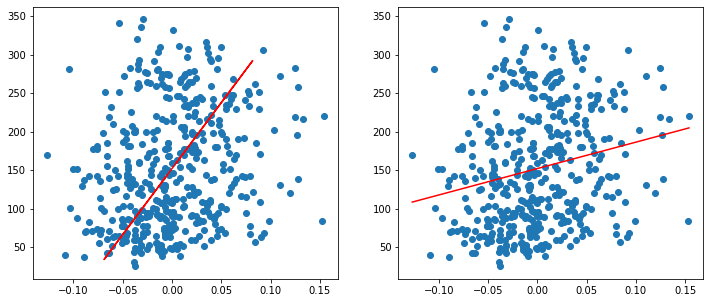

In [303]:
pca = make_pipeline(StandardScaler(), PCA(n_components=1))
xy = X[[f1, f2]].join(y)
xy_pca = pca.fit_transform(xy)
xy_i = pca.inverse_transform(xy_pca)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(xy.values[:, 0], xy.values[:, 2])
ax1.plot(xy_i[:, 0], xy_i[:, 2], color='r')

x = np.linspace(np.min(xy.values[:, 0]), np.max(xy.values[:, 0]), xy.shape[0])
a, b = np.polyfit(xy.values[:, 0], xy.values[:, 2], 1)
y_hat = a*x + b

ax2.scatter(xy.values[:, 0], xy.values[:, 2])
ax2.plot(x, y_hat, color='r')